<a href="https://colab.research.google.com/github/patbolan/ISMRM_MRS_Fitting_Challenge/blob/main/Bloch_Simulation/simulate_fid_broadening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Simulate a Lorentzian lineshape 
# This is done by simulating a exponentially decaying complex sinusoid in the time domain and 
# performing an FT to look at the Lorentzian in the frequency domain. 
# For speed, this code uses an analytical expression for the free induction decay. 
# This could also be done using a numerical solution of the Bloch eqns

# Sample in rotating frame (don't need to sample very fast)
dt = 0.0001
timeax = np.arange(0, 0.5, dt)

# Now simulate an exponentially decaying sinusoid
T2 = 0.020 # 100 ms 
R2 = 1/T2
S0 = 1 # Initial signal at t=0
offset = 0 # Hz. Let it be a little off-resonance


# Consider a group of Ni isochromats, each with a discrete off-resonance
# value. The offsets will be normally distributed around zero, with a stdev
# of X Hz
Ni = 4
spreadHz = 10
offsetsHz = np.random.randn(Ni) * spreadHz

# Calculate the time-domain signal in the rotating frame
# Create an array of FID signals
fid_array = np.zeros([timeax.shape[0], Ni], dtype='complex128')
for idx in range(0,Ni):
   fid_array[:,idx] = S0 * np.exp(-timeax * R2) * np.exp(-1j * 2 * np.pi * offsetsHz[idx] * timeax)

# Sum them and normalize
fid_sum = np.sum(fid_array,1) / Ni

# Convert to spectral domain
# Before a FT we scale the first point by 1/2. Long story, will explain
# later.....
tmp = fid_array
tmp[0,:] = tmp[0,:] * 0.5
spec_array = np.fft.fftshift(np.fft.fft(tmp, axis=0))
spec_sum = np.sum(spec_array,1) / Ni;

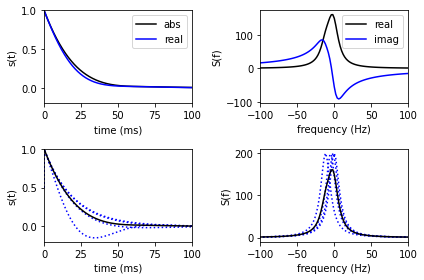

In [40]:
# Calculate the frequency domain axis
SW = 1/dt  # Hz
Npoints = timeax.shape[0]
dFreq = SW/(Npoints) # Hz
freqax = np.arange(-SW/2, SW/2, dFreq)

# Setup Plot 
fig, axs = plt.subplots(2,2)

# Time domain sum
axs[0,0].plot(timeax*1000, np.abs(fid_sum), 'k')
axs[0,0].plot(timeax*1000, np.real(fid_sum), 'b')
axs[0,0].set_xlim([0,100])
axs[0,0].set_ylim([-.2, 1])
axs[0,0].legend(['abs','real'])
axs[0,0].set_xlabel('time (ms)')
axs[0,0].set_ylabel('s(t)')

# Freq domain sum
axs[0,1].plot(freqax, np.real(spec_sum), 'k')
axs[0,1].plot(freqax, np.imag(spec_sum), 'b')
axs[0,1].legend(['real','imag'])
axs[0,1].set_xlim([-100,100])
axs[0,1].set_xlabel('frequency (Hz)')
axs[0,1].set_ylabel('S(f)')

# Time domain separate
for idx in range(Ni):
  axs[1,0].plot(timeax*1000, np.real(fid_array[:,idx]), ':b')
axs[1,0].plot(timeax*1000, np.abs(fid_sum), 'k')
axs[1,0].set_xlim([0,100])
axs[1,0].set_ylim([-.2, 1])
axs[1,0].set_xlabel('time (ms)')
axs[1,0].set_ylabel('s(t)')

# Freq domain sum
for idx in range(Ni):
  axs[1,1].plot(freqax, np.real(spec_array[:,idx]), ':b')
axs[1,1].plot(freqax, np.real(spec_sum), 'k')
axs[1,1].set_xlim([-100,100])
axs[1,1].set_xlabel('frequency (Hz)')
axs[1,1].set_ylabel('S(f)')

fig.tight_layout()
plt.show()